# 根据 SVD 进行图像的压缩处理

In [28]:
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow 

In [90]:
oriImage = Image.open('static/test.jpg')
imgArray = np.array(oriImage)
imgArray.shape

(460, 460, 4)

`imgArray` 是一个三维的数组，其中 `460 * 460` 表示 `高度 * 宽度`,最后的 4 表示的是 `颜色通道信息`,分别为 `R、G、B、A` 四个通道，其中 A 表示透明度。

### 颜色通道分离

In [91]:
R = imgArray[:,:,0]
G = imgArray[:,:,1]
B = imgArray[:,:,2]
A = imgArray[:,:,3]

### 对各个通道的矩阵进行压缩

In [92]:
def imagecompress(channel,percent):
    U,sigma,VT = np.linalg.svd(channel)
    
    m = U.shape[0]
    n = VT.shape[0]
    rechannel = np.zeros((m,n))
    for k in range(len(sigma)):
        rechannel = rechannel + sigma[k] * np.dot(U[:,k].reshape(m,1),VT[k,:].reshape(1,n))
        if float(k) / len(sigma) > percent:
            rechannel[rechannel < 0] = 0
            rechannel[rechannel > 255] = 255
            break
    return np.rint(rechannel).astype('uint8') # np.rint 用于四舍五入，uint8 会将其转成 0 - 255 的数据

In [95]:
percent = [0.001,0.005,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
matrix_list = []
for p in percent:
    reR = imagecompress(R,p)
    reG = imagecompress(G,p)
    reB = imagecompress(B,p)
    reA = imagecompress(A,p)
    reI = np.stack((reR,reG,reB,reA),2)
#     reI = np.stack((reR,reG,reB),2)

    matrix_list.append(reI)
    # Image.fromarray(reI).save("{}".format(percent)+'img.png')

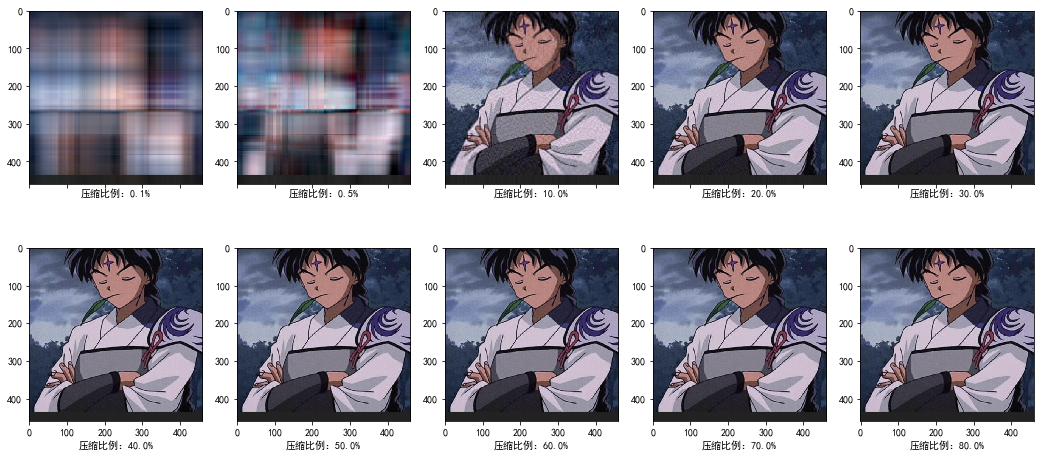

In [96]:
plt.rcParams['font.sans-serif']=['SimHei']

f, ax = plt.subplots(2, 5, sharex=True, figsize=(18, 8))
for r in range(2):
    for c in range(5):
        if r == 0:
            ax[r,c].imshow(matrix_list[c])
            ax[r,c].set_xlabel('压缩比例：{}%'.format(percent[c]*100))
        else:
            ax[r,c].imshow(matrix_list[c+5])
            ax[r,c].set_xlabel('压缩比例：{}%'.format(percent[c+5]*100))

### 保存图像

In [100]:
for index,matrix in enumerate(matrix_list):
    
    Image.fromarray(matrix).save("{}".format(percent[index])+'img.png')